## Latar Belakang

Dalam dunia ritel modern, perusahaan menghadapi tantangan besar dalam memahami pelanggan dan mengelola strategi promosi agar tepat sasaran. Untuk dapat bersaing secara efektif, perusahaan perlu memahami pola belanja pelanggan, karakteristik demografis, serta respons terhadap berbagai kampanye pemasaran. Dengan pemahaman ini, perusahaan bisa membuat keputusan berbasis data untuk meningkatkan penjualan dan loyalitas pelanggan.

## Pernyataan Masalah 
Supermarket ingin mengetahui cara yang efektif untuk meningkatkan revenue, menjaga hubungan dengan pelanggan yang sudah ada dan menarik perhatian pelanggan lama sehingga mereka aktif kembali berbelanja di supermarket tersebut.
Sebagai data scientist, kita akan coba menjawab pertanyaan berikut berdasarkan data yang tersedia:
"Bagaimana cara meningkatkan penjualan secara efektif sekaligus mengoptimalkan efisiensi anggaran promosi perusahaan."

## Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah disediakan oleh perusahaan yang bisa di download [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

In [577]:
#import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi pribadi pelanggan, tanggal pelanggan terdaftar sebagai pelanggan di supermarket, pembelian produk, respon terhadap kampanye dan diskon. Secara keseluruhan dataset ini memiliki 29 kolom yang terdiri dari:
- ID: Nomor unik untuk setiap pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status perkawinan pelanggan
- Income: Pendapatan rumah tangga pelanggan per tahun
- Kidhome: Jumlah anak di rumah pelanggan
- Teenhome: Jumlah remaja di rumah pelanggan
- Dt_Customer: Tanggal pelanggan bergabung dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak
- MntWines: Total pembelian Wine dalam 2 tahun terakhir
- MntFruits: Total pembelian buah dalam 2 tahun terakhir
- MntMeatProducts: Total pembelian produk daging dalam 2 tahun terakhir
- MntFishProducts: Total pembelian produk ikan dalam 2 tahun terakhir
- MntSweetProducts: Total pembelian produk manis dalam 2 tahun terakhir
- MntGoldProds: Total pembelian produk emas dalam 2 tahun terakhir
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima tawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima tawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima tawaran di kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 jika tidak
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam bulan terakhir

In [578]:
df = pd.read_csv("Supermarket Customers.csv")
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t04-09-2012\t58\t635\t88\t546\t172\t88\t88\t3\t8\t10\t4\t7\t0\t0\t0\t0\t0\t0\t3\t11\t1
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t08-03-2014\t38\t11\t1\t6\t2\t1\t6\t2\t1\t1\t2\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\t21-08-2013\t26\t426\t49\t127\t111\t21\t42\t1\t8\t2\t10\t4\t0\t0\t0\t0\t0\t0\t3\t11\t0
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\t10-02-2014\t26\t11\t4\t20\t10\t3\t5\t2\t2\t0\t4\t6\t0\t0\t0\t0\t0\t0\t3\t11\t0
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2014\t94\t173\t43\t118\t46\t27\t15\t5\t5\t3\t6\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\t13-06-2013\t46\t709\t43\t182\t42\t118\t247\t2\t9\t3\t4\t5\t0\t0\t0\t0\t0\t0\t3\t11\t0
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-2014\t56\t406\t0\t30\t0\t0\t8\t7\t8\t2\t5\t7\t0\t0\t0\t1\t0\t0\t3\t11\t0
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\t25-01-2014\t91\t908\t48\t217\t32\t12\t24\t1\t2\t3\t13\t6\t0\t1\t0\t0\t0\t0\t3\t11\t0
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-01-2014\t8\t428\t30\t214\t80\t30\t61\t2\t6\t5\t10\t3\t0\t0\t0\t0\t0\t0\t3\t11\t0


CSV file tidak dipisahkan oleh koma tetapi oleh tab, karena itu pandas membacanya sebagai satu kesatuan kolom.
Maka kita perlu memberitahu pandas untuk menggunakan tab sebagai pemisah kolom.

In [579]:
df = pd.read_csv("Supermarket Customers.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Understanding dan Cleaning
Sebelum melakukan analisa data, kita harus memahami dataset kita dalam tahapan *understanding*. Dalam tahap ini kita bisa mengetahui apakah ada anomali data atau *outlier*. Sering kali dataset yang tersedia adalah dataset yang masih belum siap pakai, sehingga kita harus membersihkan dataset kita.
Setiap penanganan terhadap anomali data, *outlier*, *missing value* akan dijelaskan mengapa langkah tersebut diambil.

In [580]:
#Mengecek overview dari dataset, dari sini kita bisa melihat kolom apa saja yang terdapat pada dataset, tipe data dan juga missing value.
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [581]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [582]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum kita bisa melihat bahwa:
- Dataset kita terdiri dari 29 kolom dan 2133 baris
- Usia pelanggan cukup bervariasi, dari yang muda hingga yang sudah tua
- Dalam status perkawinan ada jenis Absurd dan YOLO, sehingga kita perlu menanganinya untuk memastikan analisa yang akan kita lakukan akurat
- Pendapatan pelanggan sangat bervariasi, menunjukkan pelanggan memiliki tingkat ekonomi yang beragam
- Dataset cukup bersih, hanya ada satu kolom yaitu kolom Income yang memiliki missing value
- Tipe data sudah hampir semuanya sesuai, hanya kolom Dt_Customer yang memiliki tipe data yang salah sehingga nanti harus di ubah ke datetime
- Ada outlier di beberapa data numerik seperti pada kolom Income, MntWines, MNTMeat, dll. 

Data penting untuk menganalisa pernyataan masalah yang ada:
- Data demografi: Year_Birth, Education, Income, Marital_Status, Kidhome, Teenhome
- Daftar Produk: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
- Channel pembelian: NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
- Promosi: AcceptedCmp1-5, Response
- Aktivitas: Recency, Complain

In [583]:
#Mengubah data tipe kolom "Dt_Customer" menjadi datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [584]:
#Mengubah nama kolom agar lebih mudah dipahami
df.rename(columns={
    "Dt_Customer" : "RegisteredDate",
    "MntWines" : "Wine",
    "MntFruits" : "Fruit",
    "MntMeatProducts" : "Meat",
    "MntFishProducts" : "Fish",
    "MntSweetProducts" : "Sweet",
    "MntGoldProds" : "Gold",
    "NumDealsPurchases" : "DiscountPurchases",
    "NumWebPurchases" : "WebPurchases",
    "NumCatalogPurchases" : "CatalogPurchases",
    "NumStorePurchases" : "StorePurchases",
    "NumWebVisitsMonth" : "WebVisitsMonth",
    "AcceptedCmp3" : "Cmp3",
    "AcceptedCmp4" : "Cmp4",
    "AcceptedCmp5" : "Cmp5",
    "AcceptedCmp2" : "Cmp2",
    "AcceptedCmp1" : "Cmp1"
}, inplace=True)

In [585]:
#Mengecek apakah ada duplikasi data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Dalam hal ini tidak ada duplikasi data.

Ketika kita menggunakan syntax df.info(), kita sudah bisa melihat apakah ada missing value pada data set kita. Dalam kolom Income diinformasikan 2216 non-null, sedangkan kolom yang lain 2240 non-null, untuk lebih jelasnya kita juga bisa melakukan pengecekan missing value menggunakan .isnull() seperti yang dilakukan di bawah.

In [586]:
#Mengecek apakah ada missing value
df.isnull().sum()

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
RegisteredDate        0
Recency               0
Wine                  0
Fruit                 0
Meat                  0
Fish                  0
Sweet                 0
Gold                  0
DiscountPurchases     0
WebPurchases          0
CatalogPurchases      0
StorePurchases        0
WebVisitsMonth        0
Cmp3                  0
Cmp4                  0
Cmp5                  0
Cmp1                  0
Cmp2                  0
Complain              0
Z_CostContact         0
Z_Revenue             0
Response              0
dtype: int64

Terdapat 24 missing value di kolom income.

In [587]:
#Menampilkan data yang memiliki missing value pada kolom "Income"
df[df["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,RegisteredDate,Recency,Wine,...,WebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Untuk handle missing value pada numeric kolom, ada 2 cara yaitu:
- Menghapus kolom yang kosong -> Dalam hal ini kita tidak akan menghapus kolomnya karena akan mengurangi jumlah data.
- Mengisi missing value dengan nilai rata-rata atau mengisinya dengan nilai tengah (modus). -> Sebelum memutuskan untuk menggunakan rata-rata atau nilai tengah, kita perlu mengecek apakah ada outlier terlebih dahulu.

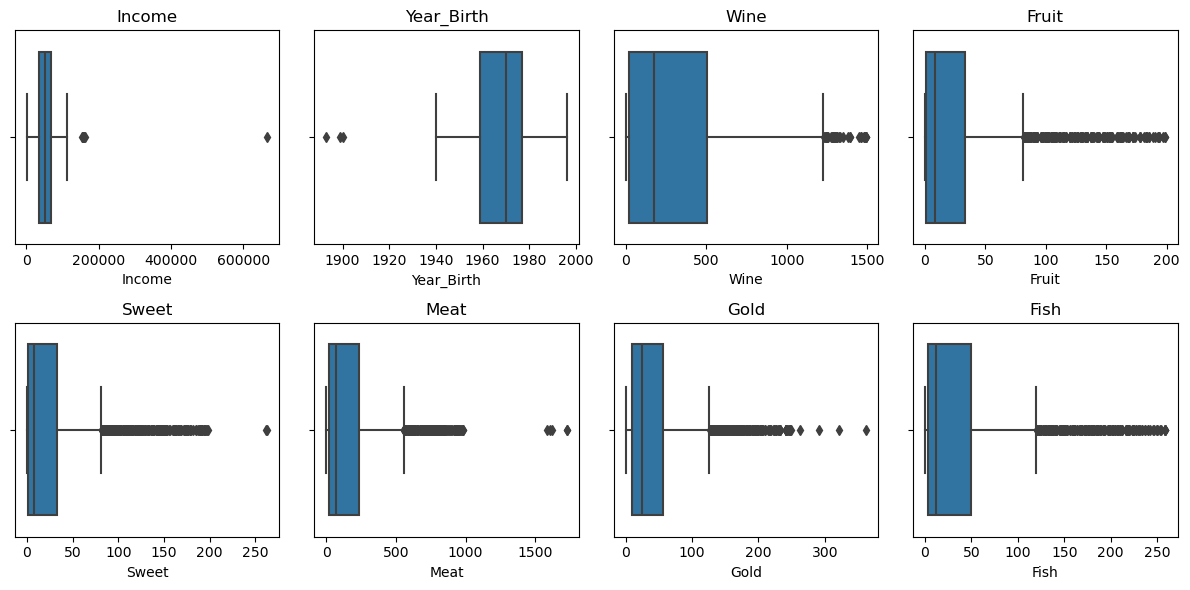

In [588]:
#cek outlier di kolom numerik

numeric_cols = ["Income", "Year_Birth","Wine", "Fruit", "Sweet", "Meat", "Gold", "Fish"]

plt.figure(figsize=(12,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

Berdasarkan grafik persebaran outlier di kolom numerik di atas, kita akan melakukan:
- Mempertahankan outlier pada total pembelian tiap produk dikarenakan data mengandung total pembelian per pelanggan di tiap produk selama 2 tahun, jika kita membersihkan outlier di total pembelian maka akan menghapus banyak data.
- Membersihkan outlier pada kolom Income dan Year_Birth.

## Cleaning Column Income

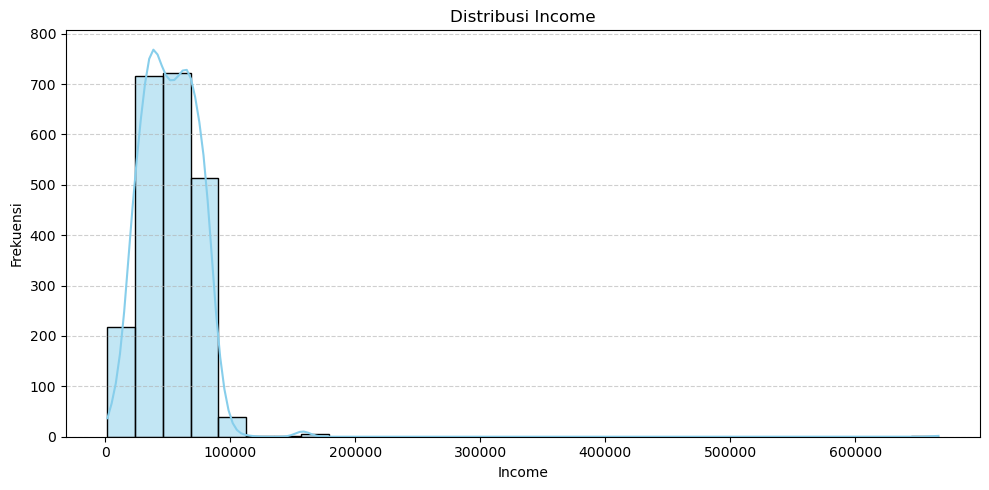

(count      2216.000000
 mean      52247.251354
 std       25173.076661
 min        1730.000000
 25%       35303.000000
 50%       51381.500000
 75%       68522.000000
 max      666666.000000
 Name: Income, dtype: float64,
 24)

In [589]:
#Visualisasi kolom pendapatan menggunakan data mentah
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

summary_stats = df['Income'].describe()
missing_count = df['Income'].isna().sum()

summary_stats, missing_count

- Grafik menunjukkan persebaran Income condong ke kanan.
- Mean dan median (50%) tidak memiliki perbedaan nilai yang drastis, menandakan tidak banyak anomali data

In [590]:
#Hapus outlier pada kolom income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: Income null tetap dipertahankan, selain itu hanya yang di dalam batas IQR
df_clean = df[(df['Income'].isnull()) | ((df['Income'] >= lower_bound) & (df['Income'] <= upper_bound))]

print(f"Jumlah data sebelum filter: {df.shape[0]}")
print(f"Jumlah data setelah filter: {df_clean.shape[0]}")


Jumlah data sebelum filter: 2240
Jumlah data setelah filter: 2232


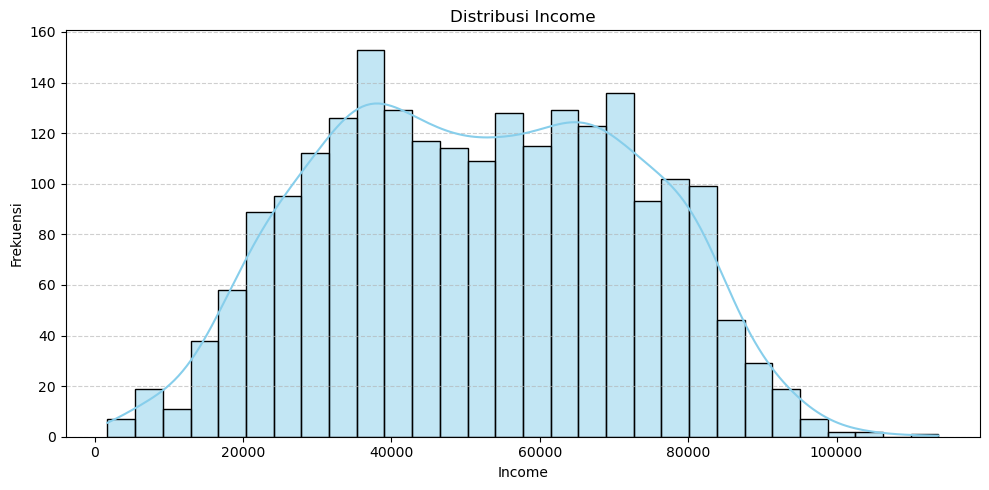

(count      2208.000000
 mean      51633.638134
 std       20713.376530
 min        1730.000000
 25%       35196.000000
 50%       51301.000000
 75%       68289.750000
 max      113734.000000
 Name: Income, dtype: float64,
 24)

In [591]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Income'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Statistik ringkas
summary_stats = df_clean['Income'].describe()
missing_count = df_clean['Income'].isna().sum()

summary_stats, missing_count

- Grafik persebaran pendapatan setelah outlier dihapus menunjukkan persebaran data yang merata.
- Perbedaan mean dan median semakin mengecil
- Nilai standar deviasi berkurang yang menunjukkan outlier berhasil dibuang

In [592]:
df_clean[df_clean["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,RegisteredDate,Recency,Wine,...,WebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [593]:
#Handling missing value pada kolom Income dengan mengisi nilai tengah
df_clean["Income"].fillna(df_clean["Income"].median(), inplace=True)

In [594]:
df_clean["Income"].describe()

count      2232.00000
mean      51630.06138
std       20601.69170
min        1730.00000
25%       35434.75000
50%       51301.00000
75%       68118.00000
max      113734.00000
Name: Income, dtype: float64

In [595]:
#Mengecek kembali apakah masih ada missing value
df_clean.isnull().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
RegisteredDate       0
Recency              0
Wine                 0
Fruit                0
Meat                 0
Fish                 0
Sweet                0
Gold                 0
DiscountPurchases    0
WebPurchases         0
CatalogPurchases     0
StorePurchases       0
WebVisitsMonth       0
Cmp3                 0
Cmp4                 0
Cmp5                 0
Cmp1                 0
Cmp2                 0
Complain             0
Z_CostContact        0
Z_Revenue            0
Response             0
dtype: int64

## Cleaning Column Year_Birth

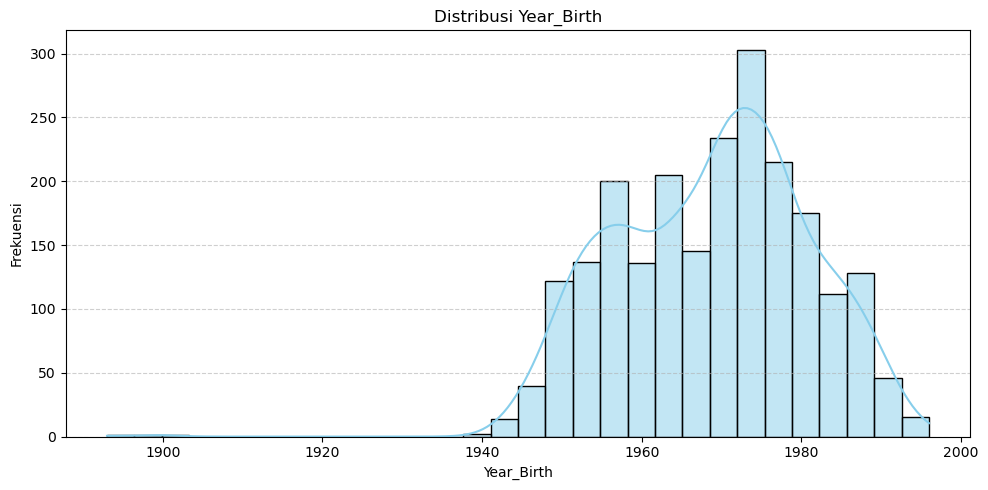

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [596]:
#Visualisasi kolom Year_Birth menggunakan data mentah
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Year_Birth'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df['Year_Birth'].describe()


- Grafik menunjukkan left skewed
- Tidak ada perbedaan signifikan antara mean dan median

In [597]:
#Hapus outlier pada kolom Year_Birth
Q1 = df_clean['Year_Birth'].quantile(0.25)
Q3 = df_clean['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: Year_Birth null tetap dipertahankan, selain itu hanya yang di dalam batas IQR
df_clean1 = df_clean[(df_clean['Year_Birth'] >= lower_bound) & (df_clean['Year_Birth'] <= upper_bound)]

print(f"Jumlah data sebelum filter: {df_clean.shape[0]}")
print(f"Jumlah data setelah filter: {df_clean1.shape[0]}")

Jumlah data sebelum filter: 2232
Jumlah data setelah filter: 2229


In [598]:
df_clean = df_clean1

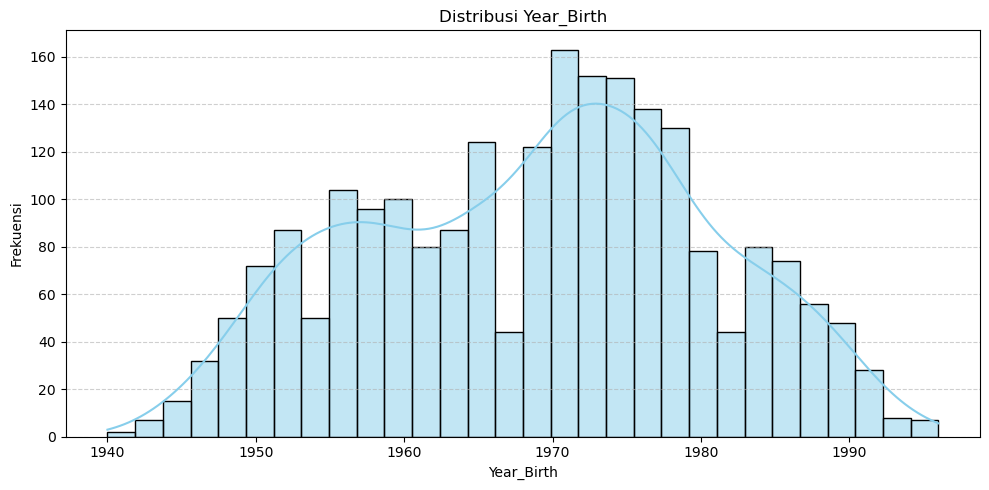

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [599]:
#Visualisasi kolom Year_Birth menggunakan data mentah
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Year_Birth'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df['Year_Birth'].describe()

In [600]:
#Menampilkan data yang memiliki status pernikahan "Absurd" dan "YOLO"
df_clean[df_clean["Marital_Status"].isin(["Absurd", "YOLO"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,RegisteredDate,Recency,Wine,...,WebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


Terdapat 4 data yang memiliki status pernikahan yang tidak sesuai, dalam hal ini bisa kita ganti menjadi "Other" untuk memudahkan analisa. Datanya tidak dihapus karena kita tidak ingin mengurangi jumlah data yang tersedia yang memungkinkan bisa mempengaruhi analisa.

In [601]:
df_clean["Marital_Status"] = df_clean["Marital_Status"].replace({"Absurd" : "Other", "YOLO" : "Other"})

In [602]:
df_clean['RegisteredDate'].max()

Timestamp('2014-06-29 00:00:00')

In [603]:
#Buat kolom usia pelanggan
df_clean['Age'] = df_clean['RegisteredDate'].dt.year - df_clean['Year_Birth']

# Buat kolom Total anak
df_clean['Total_Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

#menambahkan kolom total pembelian
produk = ["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"]
df_clean['TotalPurchase'] = df_clean[produk].sum(axis=1)


## Data Analisis
Dataset kita cukup bersih sehingga kita tidak memerlukan waktu lama untuk membersihkan dataset yang ada. Dikarenakan dataset yang sudah bersih, kita siap untuk menggunakan dataset kita ke tahap berikutnya yaitu tahap analisis sehingga kita bisa menjawab kerangka masalah yang ada.
Di sini kita akan mencari tahu produk yang paling laris, tren bulanan, hubungan antara pendapatan dan pembelian, perilaku customer terhadap diskon dan kampanye, perilaku belanja pelanggan(melalui web, katalog, atau langsung ke toko), dan kita juga akan menganalisa apakah ada hubungan antara banyaknya kunjungan ke website dan total pembelian.

## Penjualan Produk

Pertama kita perlu mengetahui produk apa saja yang dibeli oleh pelanggan

In [604]:
#Mengurutkan produk berdasarkan total terjual
top_products = df_clean[["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"]].sum().sort_values(ascending=False)
top_products_df = top_products.reset_index().rename(columns={"index": "Product", 0: "Total"})
top_products_df

,Product,Total
0,Wine,679826
1,Meat,368418
2,Gold,98328
3,Fish,83905
4,Sweet,60543
5,Fruit,58731


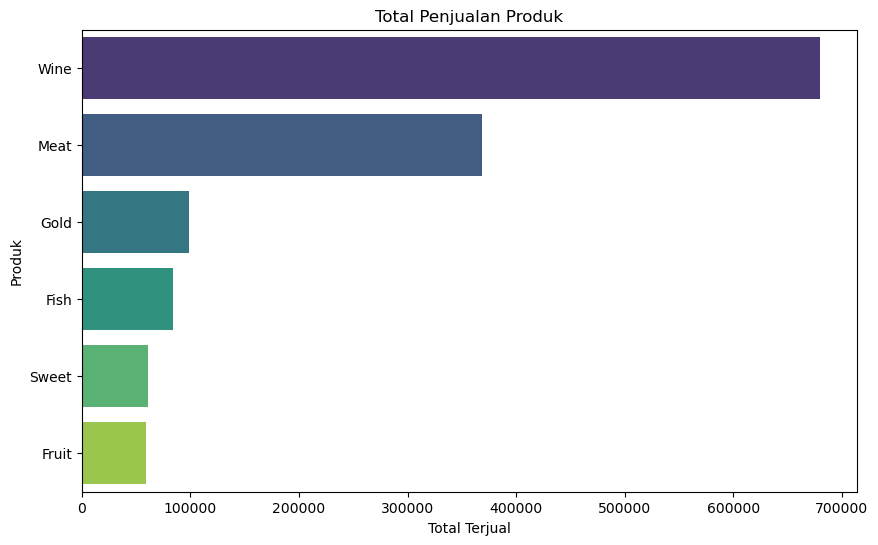

In [605]:
#Visualisai produk berdasarkan total terjual
plt.figure(figsize=(10,6))
sns.barplot(x="Total", y="Product", data=top_products_df, palette="viridis")
plt.title("Total Penjualan Produk")
plt.xlabel("Total Terjual")
plt.ylabel("Produk")
plt.show()

- Produk Wine dan Meat adalah produk yang paling sering dibeli oleh pelanggan. Hal ini menunjukkan bahwa produk dengan karakteristik lifestyle dan konsumsi rutin memiliki daya tarik tinggi.
- Terdapat selisih penjualan yang cukup signifikan antara kedua produk unggulan ini dengan produk-produk lainnya — mencerminkan adanya preferensi yang cukup kuat dari pelanggan terhadap jenis produk tertentu.
- Produk seperti Sweet dan Fish termasuk kategori dengan penjualan terendah. Tetapi, jumlah pembeli kedua produk ini hampir seimbang, yang menunjukkan bahwa mereka berada di level permintaan yang mirip namun masih tergolong rendah.

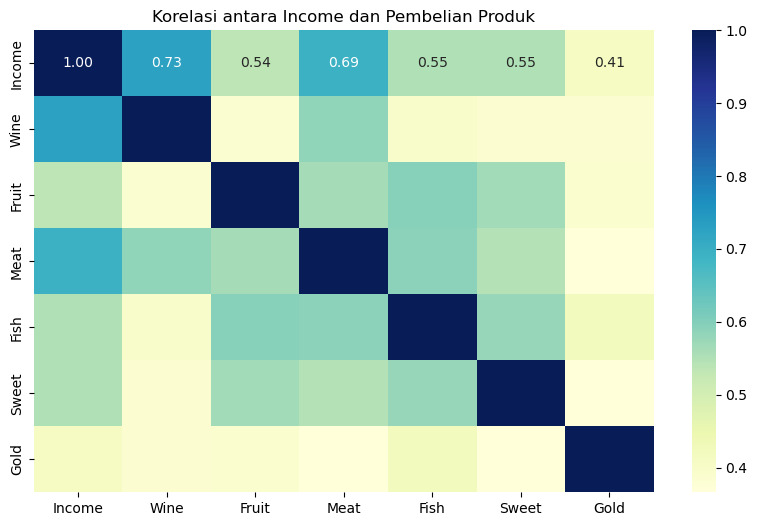

Wine     0.728182
Meat     0.693763
Fish     0.550055
Sweet    0.549801
Fruit    0.535310
Gold     0.412549
Name: Income, dtype: float64

In [606]:
hub_produk_income = df_clean[['Income'] + produk].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hub_produk_income, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Korelasi antara Income dan Pembelian Produk')
plt.show()

# Ambil korelasi income dengan masing-masing produk saja
income_to_produk_corr = hub_produk_income['Income'][1:]

income_to_produk_corr.sort_values(ascending=False)


Korelasi antara penghasilan dan jenis produk yang dibeli menjelaskan:
- Pelanggan dengan penghasilan tinggi menunjukkan cenderung membeli produk seperti wine dan meat. Pola ini cukup konsisten, mengindikasikan bahwa kedua produk tersebut memang lebih populer di kalangan pelanggan dengan daya beli lebih tinggi.
- Pembelian produk Gold tidak terbatas pada pelanggan berpenghasilan tinggi saja. Artinya, ada kemungkinan faktor lain yang memengaruhi keputusan pembelian produk ini — seperti ketertarikan personal, persepsi nilai, atau promosi tertentu.

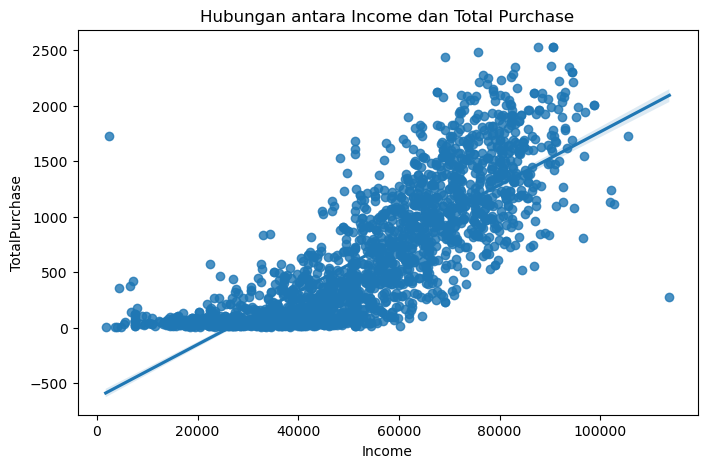

In [607]:
plt.figure(figsize=(8,5))
sns.regplot(x='Income', y='TotalPurchase', data=df_clean)
plt.title('Hubungan antara Income dan Total Purchase')
plt.show()

- Ada korelasi yang kuat antara penghasilan dan total belanja yang artinya pelanggan yang berpenghasilan tinggi juga berbelanja lumayan banyak

## Segmentasi Pelanggan

In [608]:
# Buat segmentasi usia
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Hitung distribusi umur, status pernikahan, dan total anak
age_group_dist = df_clean['Age_Group'].value_counts().sort_index()
marital_dist = df_clean['Marital_Status'].value_counts()
children_dist = df_clean['Total_Children'].value_counts()

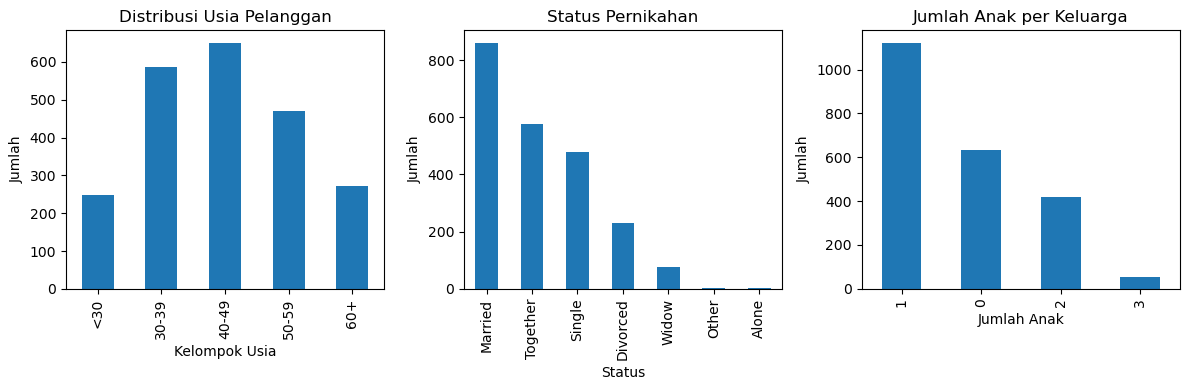

(Age_Group
 <30      249
 30-39    586
 40-49    651
 50-59    470
 60+      273
 Name: count, dtype: int64,
 Marital_Status
 Married     861
 Together    575
 Single      479
 Divorced    230
 Widow        77
 Other         4
 Alone         3
 Name: count, dtype: int64,
 Total_Children
 1    1123
 0     633
 2     420
 3      53
 Name: count, dtype: int64)

In [609]:
# Visualisasi distribusi usia
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
age_group_dist.plot(kind='bar')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')

# Plot status pernikahan
plt.subplot(1, 3, 2)
marital_dist.plot(kind='bar')
plt.title('Status Pernikahan')
plt.xlabel('Status')
plt.ylabel('Jumlah')

# Plot jumlah anak
plt.subplot(1, 3, 3)
children_dist.plot(kind='bar')
plt.title('Jumlah Anak per Keluarga')
plt.xlabel('Jumlah Anak')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

age_group_dist, marital_dist, children_dist

Berdasarkan segmentasi pelanggan yang dikelompokkan berdasarkan kelompok usia, status pernikahan, dan jumlah anak, dapat disimpulkan bahwa:
- Mayoritas pelanggan berusia 40-49 tahun dan 30-39 tahun.
- Kebanyakan pelanggan sudah menikah.
- Kebanyakan pelanggan memiliki 1 anak dan lumayan banyak juga yang tidak memiliki anak
- Sedikit pelanggan yang memiliki 3 anak

In [610]:
sales_by_kids = df_clean.groupby('Total_Children')['TotalPurchase'].sum()
sales_by_status = df_clean.groupby('Marital_Status')['TotalPurchase'].sum()

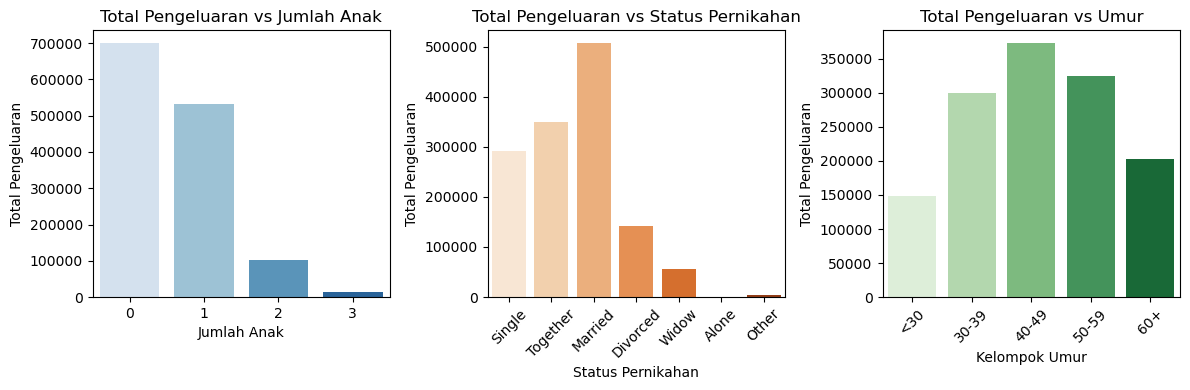

In [611]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(data=df_clean, x='Total_Children', y='TotalPurchase', estimator='sum', ci=None, palette='Blues')
plt.title('Total Pengeluaran vs Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Total Pengeluaran')


#Visualisasi total belanja vs status pernikahan
plt.subplot(1, 3, 2)
sns.barplot(data=df_clean, x='Marital_Status', y='TotalPurchase', estimator='sum', ci=None, palette='Oranges')
plt.title('Total Pengeluaran vs Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45)


#Visualisasi total belanja vs umur
plt.subplot(1, 3, 3)
sns.barplot(data=df_clean, x='Age_Group', y='TotalPurchase', estimator='sum', ci=None, palette='Greens')
plt.title('Total Pengeluaran vs Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

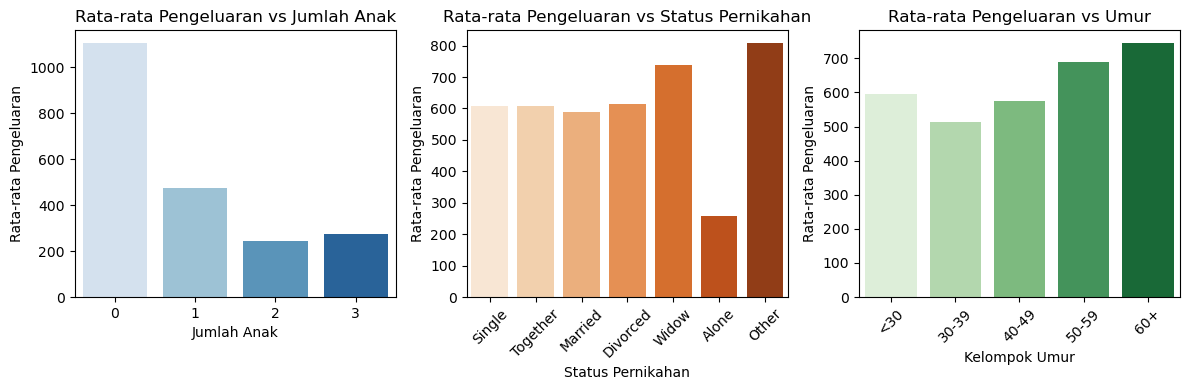

In [612]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(data=df_clean, x='Total_Children', y='TotalPurchase', estimator='mean', ci=None, palette='Blues')
plt.title('Rata-rata Pengeluaran vs Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata-rata Pengeluaran')


#Visualisasi Rata-rata belanja vs status pernikahan
plt.subplot(1, 3, 2)
sns.barplot(data=df_clean, x='Marital_Status', y='TotalPurchase', estimator='mean', ci=None, palette='Oranges')
plt.title('Rata-rata Pengeluaran vs Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Rata-rata Pengeluaran')
plt.xticks(rotation=45)


#Visualisasi Rata-rata belanja vs umur
plt.subplot(1, 3, 3)
sns.barplot(data=df_clean, x='Age_Group', y='TotalPurchase', estimator='mean', ci=None, palette='Greens')
plt.title('Rata-rata Pengeluaran vs Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Rata-rata Pengeluaran')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Informasi yang didapat dari rata-rata pengeluaran berdasarkan segmentasi pelanggan adalah:
- Pelanggan yang tidak memiliki anak atau memiliki anak sedikit, berbelanja lebih banyak dibandingkan dengan pelanggan yang memiliki anak lebih dari 1
- Pelanggan yang belum menikah berbelanja lebih banyak dibandingankan yang lainnya
- Kelompok pelanggan yang berusia 50-59 tahun dan 60 tahun ke atas berbelanja lebih banyak daripada kelompok usia yang lainnya.

## Campaign dan Diskon

Setelah mengetahui profil pelanggan, selanjutnya kita akan menganalisa bagaimana persebaran campaign ke pelanggan, respon pelanggan terhadap campaign dan juga diskon.

DI sini kita akan mencari tahu apakah campaign dan diskon memiliki pengaruh besar terhadap pembelian pelanggan.

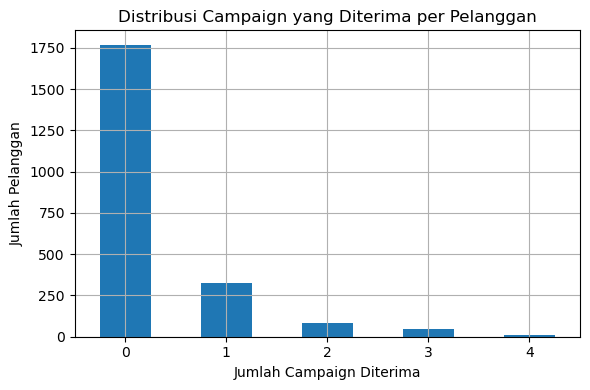

Rata-rata penghasilan pelanggan yang menerima kampanye adalah 65095.205627705625.
Rata-rata penghasilan pelanggan yang tidak menerima kampanye adalah 48095.05263157895
Rata-rata total pembelian pelanggan yang menerima kampanye adalah 1095.4004329004329.
Rata-rata total pembelian pelanggan yang tidak menerima kampanye adalah 477.4623655913978


In [613]:
# Menambahkan kolom total campaign diterima
df_clean['Total_Campaign_Accepted'] = (
    df_clean['Cmp1'] + df_clean['Cmp2'] +
    df_clean['Cmp3'] + df_clean['Cmp4'] +
    df_clean['Cmp5']
)

# Cek distribusi campaign response
distribusi_camp = df_clean['Total_Campaign_Accepted'].value_counts().sort_index()

accepted = df_clean[df_clean['Total_Campaign_Accepted'] > 0]
not_accepted = df_clean[df_clean['Total_Campaign_Accepted'] == 0]

# Bandingkan income pelanggan yang menerima vs tidak menerima campaign
avg_income_accepted = accepted['Income'].mean()
avg_income_not_accepted = not_accepted['Income'].mean()

# Visualisasi
plt.figure(figsize=(6, 4))
distribusi_camp.plot(kind='bar')
plt.title('Distribusi Campaign yang Diterima per Pelanggan')
plt.xlabel('Jumlah Campaign Diterima')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"""Rata-rata penghasilan pelanggan yang menerima kampanye adalah {avg_income_accepted}.
Rata-rata penghasilan pelanggan yang tidak menerima kampanye adalah {avg_income_not_accepted}""")

print(f"""Rata-rata total pembelian pelanggan yang menerima kampanye adalah {accepted['TotalPurchase'].mean()}.
Rata-rata total pembelian pelanggan yang tidak menerima kampanye adalah {not_accepted['TotalPurchase'].mean()}""")

Insight yang didapat dari persebaran kampanye yang diterima oleh pelanggan adalah:
- Banyak pelanggan yang tidak menerima campaign sama sekali
- Perbedaan anatara pelanggan yang tidak menerima campaign dengan pelanggan yang menerima campaign 1 kali atau lebih sangat besar
- Sangat sedikit pelanggan yang menerima campaign lebih dari 1
- Rata-rata penghasilan pelanggan yang menerima campaign masih lebih besar dari pelanggan yang tidak menerima campaign
- Rata-rata pembelian pelanggan yang menerima campaign masih lebih besar daripada pelanggan yang tidak menerima campaign

## Berdasarkan Income dan Campaign

In [614]:
#Korelasi antara total sales dengan diskon dan kampanye
target = df_clean['TotalPurchase']
cols = ['DiscountPurchases', 'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']

for col in cols:
    corr_value = target.corr(df_clean[col])
    print(f"Korelasi total sales dengan {col}: {round(corr_value, 3)}")

Korelasi total sales dengan DiscountPurchases: -0.078
Korelasi total sales dengan Cmp1: 0.383
Korelasi total sales dengan Cmp2: 0.136
Korelasi total sales dengan Cmp3: 0.054
Korelasi total sales dengan Cmp4: 0.255
Korelasi total sales dengan Cmp5: 0.47


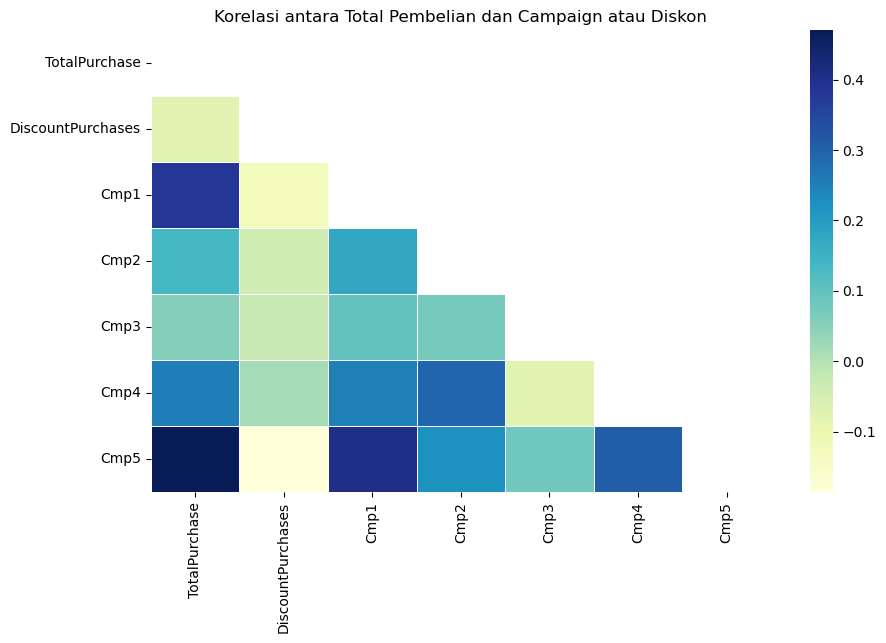

In [615]:
#Visualisasi Korelasi antara total sales dengan diskon dan kampanye
corr = df_clean[['TotalPurchase', 'DiscountPurchases', 'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap dengan mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Total Pembelian dan Campaign atau Diskon')
plt.show()

Insight yang didapat dari korelasi antara total sales dengan diskon dan kampanye, berupa:
- Diskon tidak meningkatkan total sales malah cenderung negatif dimana akan mempengaruhi profit margin
- Kampanye kelima yang paling efektif meningkatkan total sales dan disusul dengan kampanye pertama
- Kampanye ketiga mempunyai korelasi yang sangat rendah ke total sales

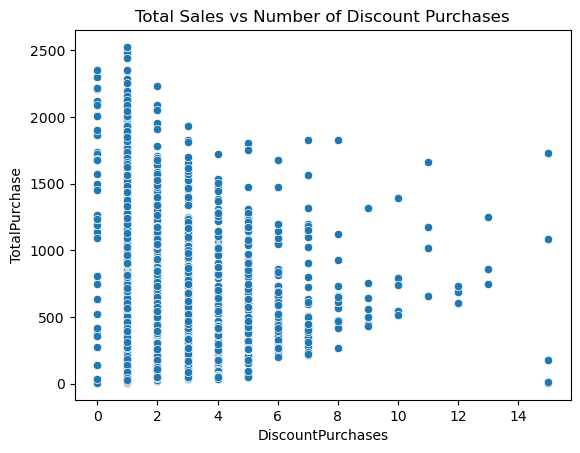

In [616]:
sns.scatterplot(x='DiscountPurchases', y='TotalPurchase', data=df_clean)
plt.title('Total Sales vs Number of Discount Purchases')
plt.show()

Hubungan antara total pembelian pelanggan dan diskon menunjukkan bahwa semakin besar diskonnya, pembeliannya malah cenderung sedikit, tidak terlalu banyak data.

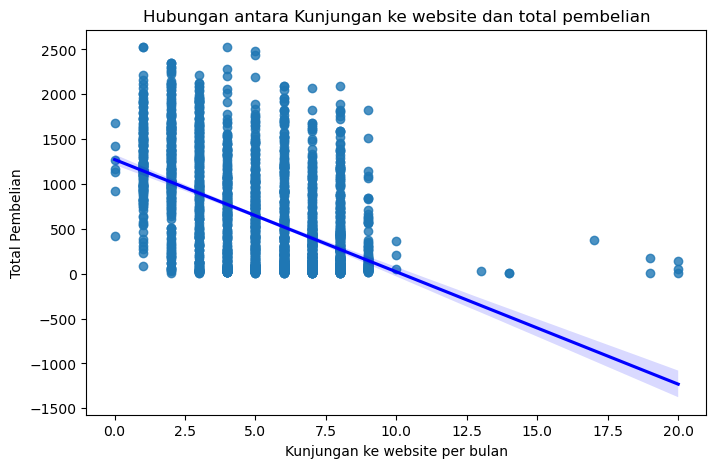

In [617]:
#hubungan antara sales dan web visits month
plt.figure(figsize=(8,5))
sns.regplot(x="WebVisitsMonth", y="TotalPurchase", data=df_clean, scatter=True, line_kws={"color": "blue"})
plt.title("Hubungan antara Kunjungan ke website dan total pembelian")
plt.xlabel("Kunjungan ke website per bulan")
plt.ylabel("Total Pembelian")
plt.show()

In [618]:
corr = df_clean['WebVisitsMonth'].corr(df_clean['TotalPurchase'])
print(f"Hubungan antara Kunjungan ke website dan total pembelian: {corr:.2f}")

Hubungan antara Kunjungan ke website dan total pembelian: -0.50


Hubungan antara Kunjungan ke website dan total belanja:
- Hampir tidak ada hubungan antara kunjungan ke website dan total belanja
- Pelanggan sering mengunjungi website bisa jadi untuk mengecek harga atau diskon tetapi tidak melakukan transaksi melalui website

## Channel Pembelian

In [619]:
purchased_loc = df_clean[["WebPurchases", "CatalogPurchases", "StorePurchases"]].sum().sort_values(ascending=False)
df_purchased_loc = purchased_loc.reset_index().rename(columns={"index": "Platform", 0: "Total"})
df_purchased_loc

,Platform,Total
0,StorePurchases,12956
1,WebPurchases,9139
2,CatalogPurchases,5877


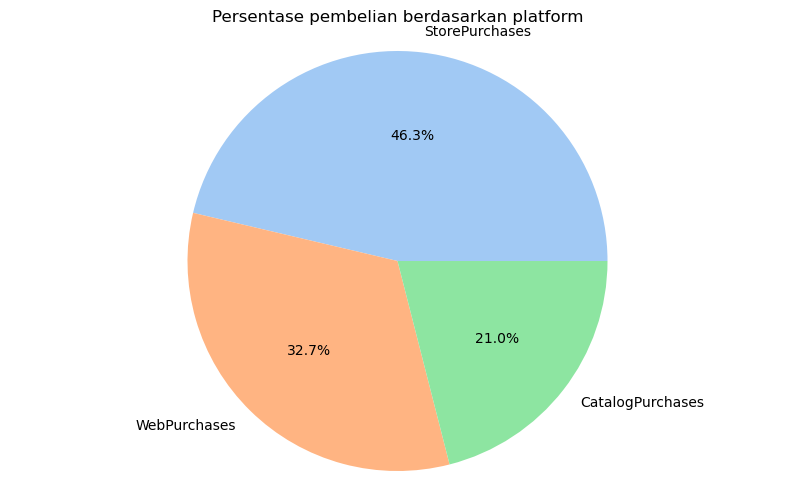

In [620]:
plt.figure(figsize=(10,6))
plt.pie(df_purchased_loc["Total"], labels=df_purchased_loc["Platform"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Persentase pembelian berdasarkan platform")
plt.axis("equal")
plt.show()

- Pelanggan cenderung berbelanja langsung ke toko
- Pembelian melalui website masih cukup unggul jika dibandingkan dengan pembelian melalui katalog

# Churn dan Retensi

In [621]:
df_clean['CohortMonth'] = df_clean['RegisteredDate'].dt.to_period('M')

last_date = df_clean['RegisteredDate'].max()
df_clean['LastPurchaseDate'] = last_date - pd.to_timedelta(df_clean['Recency'], unit='D')
df_clean['LastPurchaseMonth'] = df_clean['LastPurchaseDate'].dt.to_period('M')

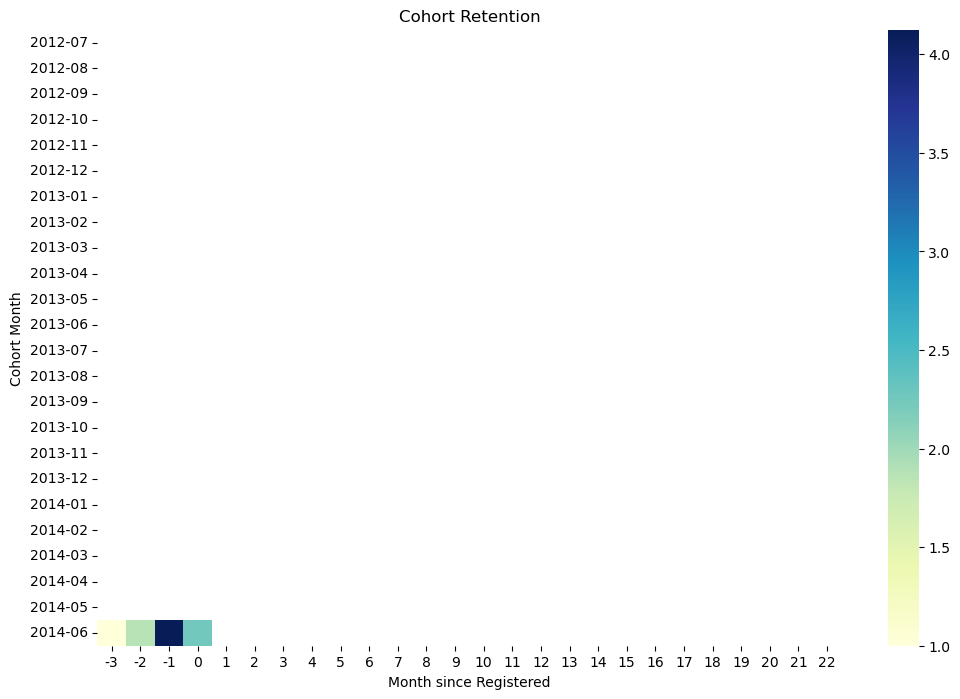

In [622]:
#Calculate cohort period
df_clean["CohortPeriod"] = (df_clean["LastPurchaseMonth"].dt.year - df_clean["CohortMonth"].dt.year) * 12 + (df_clean["LastPurchaseMonth"].dt.month - df_clean["CohortMonth"].dt.month) 

#Menghitung jumlah pelanggan per cohort
cohort_counts = df_clean.groupby(["CohortMonth", "CohortPeriod"]).size().reset_index(name="JumlahCohort")

#Membuat pivot table untuk analisis cohort
cohort_pivot = cohort_counts.pivot(index="CohortMonth", columns="CohortPeriod", values="JumlahCohort")

#Menghitung retensi pelanggan
cohort_retensi = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)

#Visualisasi retensi pelanggan
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retensi, annot=True, fmt="0.0%", cmap="YlGnBu")
plt.title("Cohort Retention")
plt.xlabel("Month since Registered")
plt.ylabel("Cohort Month")
plt.show()

In [623]:
df_clean["CohortPeriod"].unique()

array([20,  2, 10,  4,  9, 18, 12,  1,  7,  5,  6, 19, 17, 22, 21, 16, 13,
       15,  0, 14,  8, -2, -1, 11,  3, -3])

Terdapat nilai negatif dalam cohort period yang artinya adanya kesalahan memasukkan data di 'Recency' sehingga menghasilkan tanggal di 'LastPurchaseDate' lebih awal dari 'RegisteredDate'.

In [624]:
negatives = df_clean[df_clean['CohortPeriod'] < 0][['ID', 'CohortMonth', 'LastPurchaseMonth', 'Recency']]
print(negatives.head())

       ID CohortMonth LastPurchaseMonth  Recency
45   1371     2014-06           2014-04       72
53   2225     2014-06           2014-05       54
88   8504     2014-05           2014-04       70
94   2230     2014-05           2014-04       84
127  3381     2014-06           2014-05       51


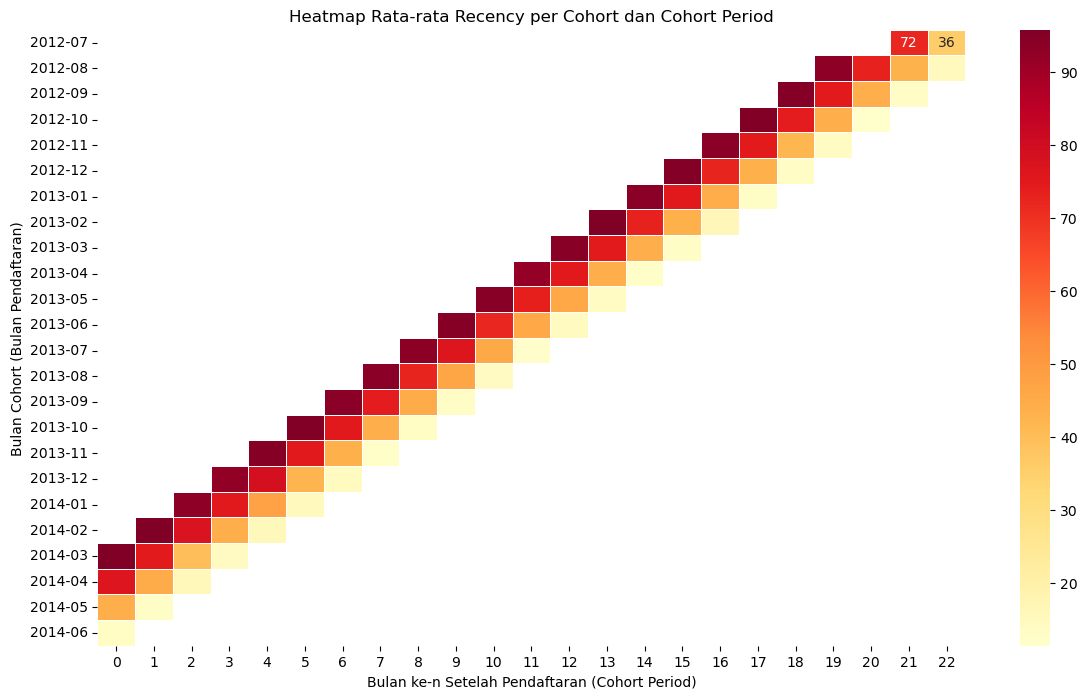

In [625]:
# Filter data anomali (LastPurchaseMonth harus sama atau setelah CohortMonth)
df_clean = df_clean[df_clean['LastPurchaseMonth'] >= df_clean['CohortMonth']]

cohort_data = df_clean.groupby(['CohortMonth', 'CohortPeriod'])['Recency'].mean().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortPeriod', values='Recency')

plt.figure(figsize=(14, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5)
plt.title("Heatmap Rata-rata Recency per Cohort dan Cohort Period")
plt.ylabel("Bulan Cohort (Bulan Pendaftaran)")
plt.xlabel("Bulan ke-n Setelah Pendaftaran (Cohort Period)")
plt.show()

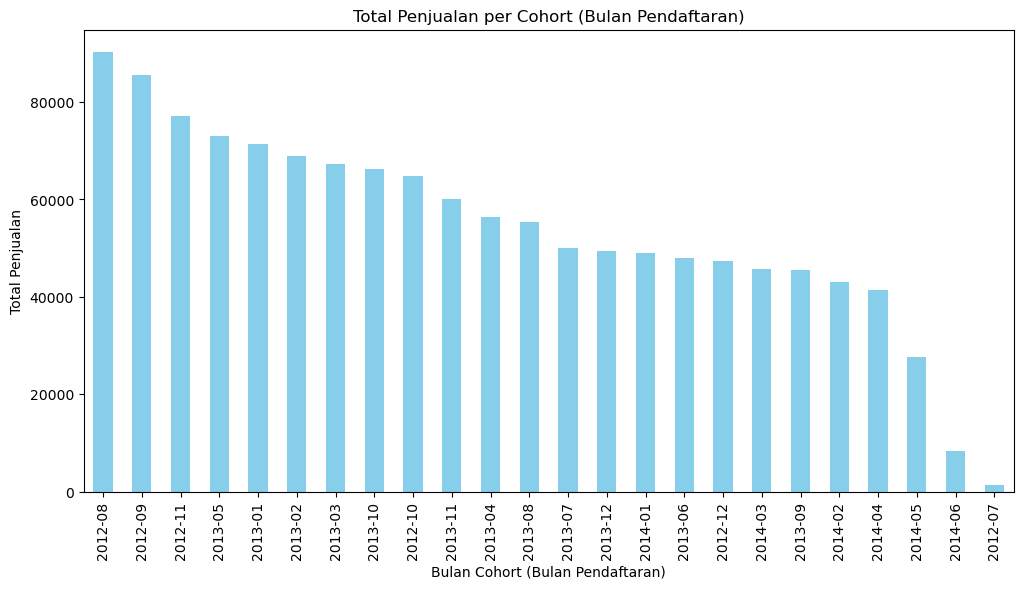

In [626]:
total_sales_cohort = df_clean.groupby(['CohortMonth', 'CohortPeriod'])['TotalPurchase'].sum().reset_index()
total_sales_pivot = total_sales_cohort.pivot(index='CohortMonth', columns='CohortPeriod', values='TotalPurchase')

# Jumlahkan total sales untuk tiap cohort (gabung semua bulan setelah pendaftaran)
total_sales_per_cohort = total_sales_cohort.groupby('CohortMonth')['TotalPurchase'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
total_sales_per_cohort.plot(kind='bar', color='skyblue')


plt.title('Total Penjualan per Cohort (Bulan Pendaftaran)')
plt.xlabel('Bulan Cohort (Bulan Pendaftaran)')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

Dari hasil grafik di atas menunjukkan pelanggan lama memiliki total pembelian yang cukup besar sehingga kita bisa membuat loyalti program untuk menarik perhatian mereka agar mereka kembali berbelanja di supermarket kita.

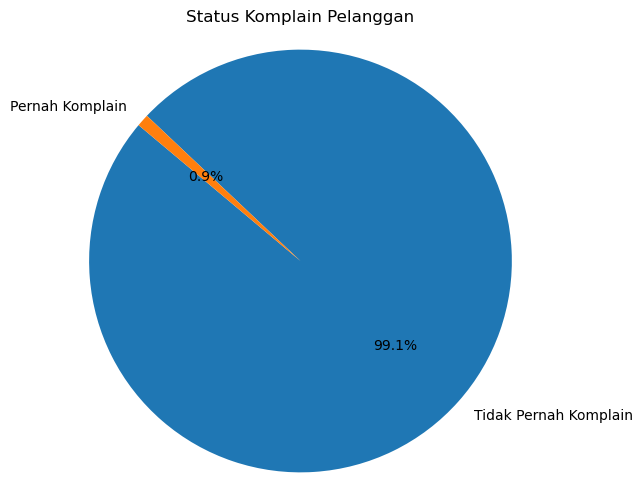

In [639]:
# Hitung jumlah pelanggan berdasarkan status komplain
complain_counts = df_clean['Complain'].value_counts().sort_index()
labels = ['Tidak Pernah Komplain', 'Pernah Komplain']

plt.figure(figsize=(6, 6))
plt.pie(complain_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Status Komplain Pelanggan')
plt.axis('equal')
plt.show()

Dari data yang ada memang kurang dari 1% pelanggan yang pernah komplain akan tetapi kita tidak bisa langsung mengatakan bahwa ini adalah data yang sesungguhnya karena bisa jadi ada pelanggan yang memang tidak puas tetapi mereka memilih untuk tidak komplain langsung ke management.

Dari sini bisa kita tingkatkan pengumpulan feedback dari pelanggan, sehingga nantinya bisa kita bandingkan persentase feedback yang kita dapatkan dan komplain.

In [627]:
df_clean['Churn_Risk'] = ((df_clean['Recency'] > 60) & 
                    (df_clean[['WebPurchases', 'CatalogPurchases', 'StorePurchases']].sum(axis=1) == 0)).astype(int)

df_clean.groupby('Churn_Risk')[['Income', 'TotalPurchase', 'Complain', 'WebVisitsMonth']].mean()

,Income,TotalPurchase,Complain,WebVisitsMonth
Churn_Risk,,,,
0,51485.430726,609.390669,0.009425,5.385014


Dari hasil di atas bisa dilihat bahwa tidak ada pelanggan yang berpotensi churn, sehingga kita harus memperketat kualifikasinya.

In [628]:
df_clean['Churn_Risk'] = (
    (df_clean['Recency'] > 60) & 
    (df_clean['WebVisitsMonth'] < 2)
).astype(int)

churn = df_clean['Churn_Risk'].value_counts()
churn

Churn_Risk
0    2071
1      51
Name: count, dtype: int64

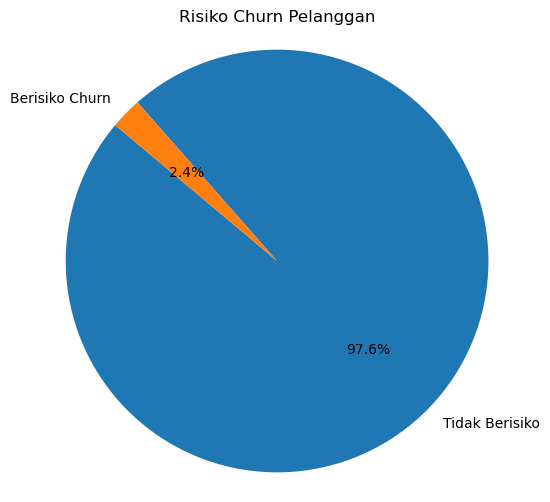

In [636]:
churn = df_clean['Churn_Risk'].value_counts().sort_index()
labels = ['Tidak Berisiko', 'Berisiko Churn']  # 0 duluan, lalu 1
#colors = ['#8cd17d', '#ff6e54']

plt.figure(figsize=(6, 6))
plt.pie(churn, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Risiko Churn Pelanggan')
plt.axis('equal')
plt.show()

Setelah menambahkan jumlah kunjungan ke website minimal 2 kali ke dalam kualifikasi pelanggan yang berpotensi churn, kita mendapatkan hasil sebanyak 51 pelanggan berpotensi churn.

In [630]:
pd.crosstab(df_clean['Complain'], df_clean['Churn_Risk'], normalize='index') * 100

Churn_Risk,0,1
Complain,,
0,97.573739,2.426261
1,100.000000,0.000000


Hubungan antara komplin dan potensi churn cukup menarik, pelanggan yang tidak komplin yang memiliki potensi churn sedangkan pelanggan yang komplin tidak berpotensi churn. Akan tetapi walaupun pelanggan yang komplin tidak berpotensi churn, kita tidak bisa mengabaikan komplin atau pelanggan yang pernah komplin karena bisa saja pelanggan ini pergi diam-diam.

In [631]:
# Groupby complain dan hitung rata-rata
df_clean.groupby('Complain')[['TotalPurchase', 'WebVisitsMonth']].mean()

,TotalPurchase,WebVisitsMonth
Complain,,
0,611.459087,5.38059
1,392.000000,5.85000


- Pelanggan yang komplin punya rata-rata belanja lebih rendah tapi mereka sering mengunjungi website sehingga nanti kita bisa mengoptimalkan upselling atau promosi di website untuk menarik perhatian pelanggan ini.

## Pertumbuhan Pelanggan

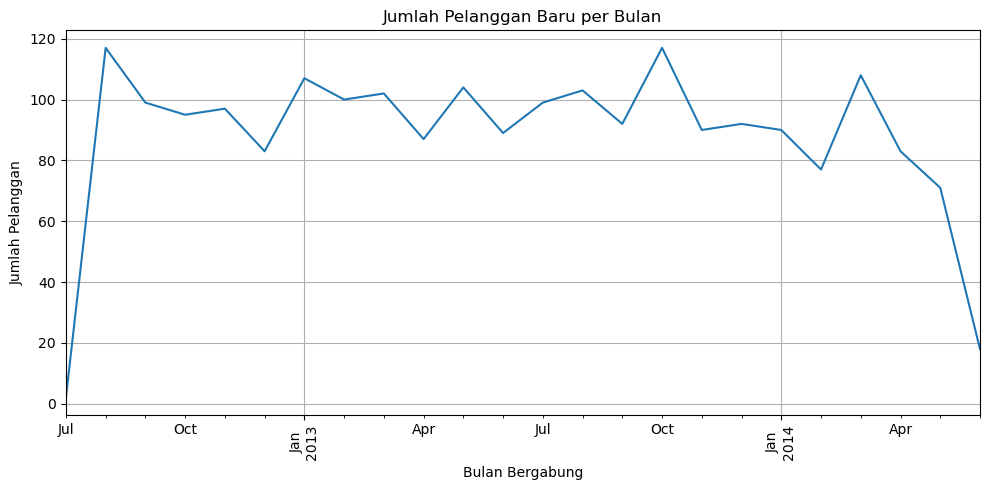

In [632]:
# Hitung jumlah pelanggan yang bergabung per bulan (dari Dt_Customer)
monthly_new_customers = df_clean['CohortMonth'].value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(10, 5))
monthly_new_customers.plot(kind='line')
plt.title('Jumlah Pelanggan Baru per Bulan')
plt.xlabel('Bulan Bergabung')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

- Pertumbuhan pelanggan dari bulan ke bulan cenderung fluktuatif
- Penurunan pelanggan yang drastis dari bulan Mei 2024 ke Juni 2024 bisa jadi dikarenakan data bulan Juni masih belum lengkap

# Kesimpulan dan Rekomendasi

## Kesimpulan 

Berdasarkan hasil analisis terhadap 2.240 data pelanggan, ditemukan pola-pola yang cukup jelas mengenai karakteristik, perilaku belanja, dan respon terhadap campaign pemasaran:

- Mayoritas pelanggan adalah keluarga muda dan mapan, dengan usia 30–49 tahun, status menikah, dan jumlah anak sedikit.
- Pelanggan dengan pendapatan tinggi berkontribusi besar terhadap total pembelian, khususnya pada produk wine dan meat.
- Campaign marketing belum dimanfaatkan secara maksimal – mayoritas pelanggan bahkan belum pernah menerimanya.
- Diskon tidak efektif meningkatkan penjualan, bahkan cenderung berdampak negatif terhadap margin keuntungan.
- Website lebih sering digunakan untuk eksplorasi, bukan transaksi – pelanggan cenderung tetap belanja langsung.
- Customer loyalty tidak selalu berbanding lurus dengan kepuasan – pelanggan yang komplain justru menunjukkan retensi lebih baik dibandingkan pelanggan yang diam-diam berhenti.

## Rekomendasi
Berikut langkah-langkah strategis yang bisa segera dijalankan dan hasilnya dapat diukur secara nyata:

1. Targetkan campaign untuk produk unggulan seperti wine dan meat ke pelanggan yang memiliki pendapatan tinggi untuk meningkatkan penjualan produk unggulan sebesar 20% dalam 2 bulan
2. Membuat paket bundle antara produk yg paling laku dengan produk yang kurang laku untuk meningkatkan 10% penjualan produk yang kurang laku
3. Memberikan promosi khusus untuk pelanggan yang membeli melalui website untuk mengubah 25% kunjungan ke website menjadi pembelian yang aktif
4. Analisa ulang campaign 5 dan 1 dan ulangi penerapannya, karena dari 5 campaign, campaign 5 dan 1 yang paling efektif
5. Berikan loyalti program atau campaign untuk pelanggan lama agar setidaknya 20% pelanggan lama aktif lagi berbelanja
6. Aktifkan program referal agar pelanggan lama mengajak temannya sehingga di sini kita bisa mencapai tujuan pengaktifan kembali pelanggan lama dan pertumbuhan pelanggan baru
7. Berikan promo khusus untuk pelanggan baru sehingga pertumbuhan pelanggan terus meningkat setidaknya 10% tiap bulan
8. Buat personal email dan promo khusus untuk pelanggan yang pernah komplin untuk mengurangi 30% potensi churn dan juga mengajak pelanggan lama yang pernah komplin untuk aktif berbelanja lagi

Dengan memahami karakteristik pelanggan dari berbagai sisi — mulai dari demografi, pola pembelian, efektivitas campaign, hingga preferensi channel — analisis ini diharapkan dapat membantu perusahaan dalam:

- Mengoptimalkan strategi pemasaran dengan pendekatan yang lebih tepat sasaran,
- Meningkatkan efisiensi biaya promosi melalui campaign yang lebih terarah dan tidak bergantung pada diskon massal,
- Memaksimalkan potensi pelanggan loyal melalui pendekatan berbasis data, termasuk kepada pelanggan yang sebelumnya dianggap pasif,
- Serta meningkatkan total penjualan secara berkelanjutan dengan menggali peluang dari produk-produk yang kurang diminati dan channel digital yang belum optimal.

Dengan strategi berbasis data ini, perusahaan tidak hanya dapat meningkatkan konversi penjualan, tetapi juga mengelola pelanggan dengan lebih efektif, baik dari sisi akuisisi, retensi, maupun profitabilitas jangka panjang.